In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import csv
import os
import random
import matplotlib.pyplot as plt

/home/shreyas/.local/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


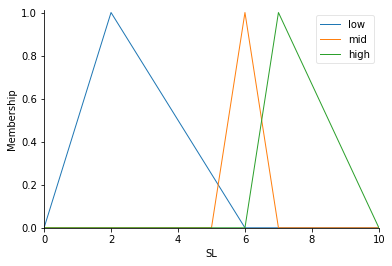

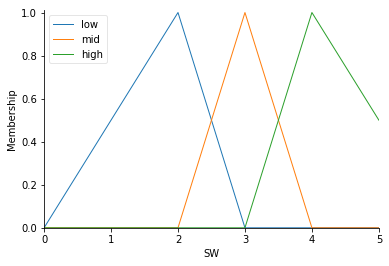

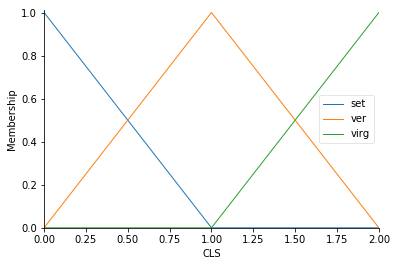

In [2]:
Dict = { 
    'sla' : 0.0,
    'slb' : 2.0,
    'slc' : 6.0,
    'sli' : 5.0,
    'slj' : 6.0,
    'slk' : 7.0,
    'slx' : 6.0,
    'sly' : 7.0,
    'slz' : 10.0,
    'swa' : 0.0,
    'swb' : 2.0,
    'swc' : 3.0,
    'swi' : 2.0,
    'swj' : 3.0,
    'swk' : 4.0,
    'swx' : 3.0,
    'swy' : 4.0,
    'swz' : 6.0,
    'pla' : 0.0,
    'plb' : 2.0,
    'plc' : 3.0,
    'pli' : 2.0,
    'plj' : 3.5,
    'plk' : 5.0,
    'plx' : 4.0,
    'ply' : 4.5,
    'plz' : 10.0,
    'pwa' : -10.0,
    'pwb' : 0.5,
    'pwc' : 1.0,
    'pwi' : 0.5,
    'pwj' : 1.0,
    'pwk' : 2.0,
    'pwx' : 1.5,
    'pwy' : 3.0,
    'pwz' : 6.0
}

Dict1 = {'pla': -0.4256118510602194,
 'plb': 1.6677067291460035,
 'plc': 2.636417400745747,
 'pli': 2.034844191251139,
 'plj': 3.149509595285551,
 'plk': 4.58395721946749,
 'plx': 3.6032393198128125,
 'ply': 4.822193305901144,
 'plz': 10.326367392038163,
 'pwa': -10.006482260805802,
 'pwb': 0.46166845332665407,
 'pwc': 1.102997113690135,
 'pwi': 0.5572994143733334,
 'pwj': 0.7905012151430494,
 'pwk': 1.745579196978651,
 'pwx': 1.5458489538268871,
 'pwy': 3.1720002231916467,
 'pwz': 5.7865093307079505,
 'sla': 0.23095465784839656,
 'slb': 2.0789078129936778,
 'slc': 6.199009006260825,
 'sli': 4.85404558269234,
 'slj': 6.167645102885239,
 'slk': 6.671570042458445,
 'slx': 6.174624453093443,
 'sly': 7.407064066240753,
 'slz': 10.118719086898153,
 'swa': -0.11350529340270495,
 'swb': 2.230997365412584,
 'swc': 3.151003324420406,
 'swi': 1.869275380828389,
 'swj': 3.296302601156799,
 'swk': 3.8649641614910424,
 'swx': 3.433198195046308,
 'swy': 3.8831292495232006,
 'swz': 5.856833550119456}

SL_arr = np.arange(0, 11, 1)
SW_arr = np.arange(0,6,1)
PL_arr = np.arange(0, 11, 1)
PW_arr = np.arange(0,6,1)
CLS_arr = np.arange(0,3,1)

SL = ctrl.Antecedent(SL_arr, 'SL')
SW = ctrl.Antecedent(SW_arr, 'SW')
PL = ctrl.Antecedent(PL_arr, 'PL')
PW = ctrl.Antecedent(PW_arr, 'PW')

CLS = ctrl.Consequent(CLS_arr, 'CLS')

SL['low'] = fuzz.trimf(SL_arr,[Dict['sla'], Dict['slb'], Dict['slc']])
SL['mid'] = fuzz.trimf(SL_arr,[Dict['sli'], Dict['slj'], Dict['slk']])
SL['high'] = fuzz.trimf(SL_arr,[Dict['slx'], Dict['sly'], Dict['slz']])

SW['low'] = fuzz.trimf(SW_arr,[Dict['swa'], Dict['swb'], Dict['swc']])
SW['mid'] = fuzz.trimf(SW_arr,[Dict['swi'],Dict['swj'],Dict['swk']])
SW['high'] = fuzz.trimf(SW_arr,[Dict['swx'],Dict['swy'],Dict['swz']])

PL['low'] = fuzz.trimf(PL_arr,[Dict['pla'],Dict['plb'],Dict['plc']])
PL['mid'] = fuzz.trimf(PL_arr,[Dict['pli'], Dict['plj'], Dict['plk']])
PL['high'] = fuzz.trimf(PL_arr,[Dict['plx'], Dict['ply'], Dict['plz']])

PW['low'] = fuzz.trimf(PW_arr,[Dict['pwa'], Dict['pwb'], Dict['pwc']])
PW['mid'] = fuzz.trimf(PW_arr,[Dict['pwi'], Dict['pwj'] , Dict['pwk']])
PW['high'] = fuzz.trimf(PW_arr,[Dict['pwx'], Dict['pwy'], Dict['pwz']])

CLS['set'] = fuzz.trimf(CLS_arr,[-0.5, 0 , 0.5])
CLS['ver'] = fuzz.trimf(CLS_arr,[0, 1 , 1.5])
CLS['virg'] = fuzz.trimf(CLS_arr,[1.5, 2 , 2.5])

SL.view()
SW.view()
#PL.view()
#PW.view()
CLS.view()

In [3]:
def initialization():
    ##RULES
    rule0 = ctrl.Rule(antecedent=(PW['low']),
                      consequent=CLS['set'], label='rule0')
    rule1 = ctrl.Rule(antecedent=((PW['low'] | PW['mid']) &
                                  (PL['low'] | PL['mid'])),
                      consequent=CLS['ver'], label='rule1')
    rule2 = ctrl.Rule(antecedent=((PW['low'] | PW['mid']) &
                                  (PL['mid'] | PL['high'])),
                      consequent=CLS['virg'], label='rule2')
    rule3 = ctrl.Rule(antecedent=(PW['high']),
                      consequent=CLS['virg'], label='rule3')
    
    
    system = ctrl.ControlSystem([rule0,rule1, rule2, rule3])
    sim = ctrl.ControlSystemSimulation(system)
    return sim

In [4]:
#sample input
##Fuzzyfication and defuzzyfication
sim = initialization()
sim.input['PW']=2
sim.input['PL']=3
sim.compute()
sim.output['CLS']

1.5777777777777777

In [9]:
def fitness(sim):
    correct = 0
    with open('./iris/iris1.csv','rb') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if(line_count==0):
                line_count+=1
                print(", ".join(row))
            else:
                print(", ".join(row))
                line_count += 1
                sl = row[0]
                sw = row[1]
                pl = row[2]
                pw = row[3]
                cls = row[4]
                sim.input['PW']=float(pw)
                sim.input['PL']=float(pl)
                #sim.input['SL']=float(sl)
                #sim.input['SW']=float(sw)
                sim.compute()
                #print("Output of above row "+ str(sim.output['CLS']))
                if(sim.output['CLS']<=0.9):
                    print("Iris-setosa")
                    #print(cls)
                    if("Iris-setosa" in cls):
                        correct += 1
                elif(sim.output['CLS']>0.9 and sim.output['CLS']<=1.5):
                    print("Iris-versicolor")
                    #print(cls)
                    if("Iris-versicolor" in cls):
                        correct += 1
                else:
                    print("Iris-virginica")
                    #print(cls)
                    if("Iris-virginica" in cls):
                        correct += 1

    return(correct/150.0)

In [11]:
fitness(sim)

SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species
5.1, 3.5, 1.4, 0.2, Iris-setosa
Iris-setosa
4.9, 3, 1.4, 0.2, Iris-setosa
Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
Iris-setosa
5, 3.6, 1.4, 0.2, Iris-setosa
Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
Iris-setosa
5, 3.4, 1.5, 0.2, Iris-setosa
Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
Iris-setosa
4.8, 3, 1.4, 0.1, Iris-setosa
Iris-setosa
4.3, 3, 1.1, 0.1, Iris-setosa
Iris-setosa
5.8, 4, 1.2, 0.2, Iris-setosa
Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
Iris-setosa
5.1, 3.7, 1.5, 0.4, Ir

0.9466666666666667

In [199]:
def selection(Dict):
    lst = random.sample(list(Dict),10)
    return lst

In [200]:
def crossover(parent1,parent2):
    size = len(parent1)
    startkey = random.choice(list(parent1))
    flag=0
    for i in parent1.keys():
        if(i == startkey):
            flag=1
        if(flag==1):
            temp = parent1[i]
            parent1[i] = parent2[i]
            parent2[i] = temp
    return parent1,parent2

In [201]:
def mutate(lst):#not using
    for i in lst:
        Dict[i] = random.uniform(Dict[i]-0.1,Dict[i]+0.1)
    return (Dict)

In [202]:
def mutation(parent):
    l = len(parent)
    index = random.choice(list(parent))
    parent[index] = parent[index] - 0.05
    return parent

In [203]:
def checkDict(Dict):
        if((Dict['sla']>Dict['slb']) or (Dict['slb']>Dict['slc']) or (Dict['sli']>Dict['slc'])):
            return 0
        if((Dict['sli']>Dict['slj']) or (Dict['slj']>Dict['slk']) or (Dict['slx']>Dict['slk'])):
            return 0
        if((Dict['slx']>Dict['sly']) or (Dict['sly']>Dict['slz'])):
            return 0
        
        if((Dict['swa']>Dict['swb']) or (Dict['swb']>Dict['swc']) or (Dict['swi']>Dict['swc'])):
            return 0
        if((Dict['swi']>Dict['swj']) or (Dict['swj']>Dict['swk']) or (Dict['swx']>Dict['swk'])):
            return 0
        if((Dict['swx']>Dict['swy']) or (Dict['swy']>Dict['swz'])):
            return 0
        
        if((Dict['pla']>Dict['plb']) or (Dict['plb']>Dict['plc']) or (Dict['pli']>Dict['plc'])):
            return 0
        if((Dict['pli']>Dict['plj']) or (Dict['plj']>Dict['plk']) or (Dict['plx']>Dict['plk'])):
            return 0
        if((Dict['plx']>Dict['ply']) or (Dict['ply']>Dict['plz'])):
            return 0
        
        if((Dict['pwa']>Dict['pwb']) or (Dict['pwb']>Dict['pwc']) or (Dict['pwi']>Dict['pwc'])):
            return 0
        if((Dict['pwi']>Dict['pwj']) or (Dict['pwj']>Dict['pwk']) or (Dict['pwx']>Dict['pwk'])):
            return 0
        if((Dict['pwx']>Dict['pwy']) or (Dict['pwy']>Dict['pwz'])):
            return 0
        
        return 1

In [204]:
def setmf(Dict):
    SL['low'] = fuzz.trimf(SL_arr,[Dict['sla'], Dict['slb'], Dict['slc']])
    SL['mid'] = fuzz.trimf(SL_arr,[Dict['sli'], Dict['slj'], Dict['slk']])
    SL['high'] = fuzz.trimf(SL_arr,[Dict['slx'], Dict['sly'], Dict['slz']])

    SW['low'] = fuzz.trimf(SW_arr,[Dict['swa'], Dict['swb'], Dict['swc']])
    SW['mid'] = fuzz.trimf(SW_arr,[Dict['swi'],Dict['swj'],Dict['swk']])
    SW['high'] = fuzz.trimf(SW_arr,[Dict['swx'],Dict['swy'],Dict['swz']])

    PL['low'] = fuzz.trimf(PL_arr,[Dict['pla'],Dict['plb'],Dict['plc']])
    PL['mid'] = fuzz.trimf(PL_arr,[Dict['pli'], Dict['plj'], Dict['plk']])
    PL['high'] = fuzz.trimf(PL_arr,[Dict['plx'], Dict['ply'], Dict['plz']])

    PW['low'] = fuzz.trimf(PW_arr,[Dict['pwa'], Dict['pwb'], Dict['pwc']])
    PW['mid'] = fuzz.trimf(PW_arr,[Dict['pwi'], Dict['pwj'] , Dict['pwk']])
    PW['high'] = fuzz.trimf(PW_arr,[Dict['pwx'], Dict['pwy'], Dict['pwz']])

    CLS['set'] = fuzz.trimf(CLS_arr,[-0.5, 0 , 0.5])
    CLS['ver'] = fuzz.trimf(CLS_arr,[0, 1 , 1.5])
    CLS['virg'] = fuzz.trimf(CLS_arr,[1.5, 2 , 2.5])
    
    ##RULES
    rule0 = ctrl.Rule(antecedent=(PW['low']),
                      consequent=CLS['set'], label='rule0')
    rule1 = ctrl.Rule(antecedent=((PW['low'] | PW['mid']) &
                                  (PL['low'] | PL['mid'])),
                      consequent=CLS['ver'], label='rule1')
    rule2 = ctrl.Rule(antecedent=((PW['low'] | PW['mid']) &
                                  (PL['mid'] | PL['high'])),
                      consequent=CLS['virg'], label='rule2')
    rule3 = ctrl.Rule(antecedent=(PW['high']),
                      consequent=CLS['virg'], label='rule3')
    
    
    system = ctrl.ControlSystem([rule0,rule1, rule2, rule3])
    sim = ctrl.ControlSystemSimulation(system)

In [205]:
sim = initialization()

In [206]:
f = fitness(sim)
print(f)

0.946666666667


In [207]:
count = 0
while(count <=100):
    count=count+1
    lst = selection(Dict)
    Dict, Dict1 = crossover(Dict,Dict1)
    Dict = mutation(Dict)
    chk = checkDict(Dict)
    x=500
    while(chk == 0 and x>=0):
        mutation(Dict)
        #print(chk)
        chk = checkDict(Dict)
        x = x-1
    if(chk==1):
        setmf(Dict)
        
    if(fitness(sim)==0):
        break
    #else:
        #print(fitness(sim))
print(fitness(sim))

0.946666666667
